In [ ]:
from sklearn.model_selection import train_test_split
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def getsentiment(x):
    if(x==1):
        return 1*x
    else:
        return x+0

In [ ]:
tabledep = pd.read_csv("sentiment_tweets3.csv")
tabledep["label (depression result)"] = tabledep["label (depression result)"].apply(getsentiment)
coldep = [tabledep["message to examine"],tabledep["label (depression result)"]]
headers=["message to examine","sentiment"]
datadep = pd.concat(coldep, axis=1,keys=headers)
print(datadep)

                                      message to examine  sentiment
0      just had a real good moment. i missssssssss hi...          0
1             is reading manga  http://plurk.com/p/mzp1e          0
2      @comeagainjen http://twitpic.com/2y2lx - http:...          0
3      @lapcat Need to send 'em to my accountant tomo...          0
4          ADD ME ON MYSPACE!!!  myspace.com/LookThunder          0
...                                                  ...        ...
10309  No Depression by G Herbo is my mood from now o...          1
10310  What do you do when depression succumbs the br...          1
10311  Ketamine Nasal Spray Shows Promise Against Dep...          1
10312  dont mistake a bad day with depression! everyo...          1
10313                                                  0          1

[10314 rows x 2 columns]


In [ ]:
value_counts = tabledep['label (depression result)'].value_counts()
print(value_counts)

0    8000
1    2314
Name: label (depression result), dtype: int64


In [ ]:
chunk_size = 85000  # Adjust this value as needed

# Create a CSV reader with chunksize
chunks = pd.read_csv("training.csv", encoding='latin-1', header=None, chunksize=chunk_size, usecols=[0, 5])

# Initialize an empty list to store the chunks
chunk_list = []

# Process each chunk in a loop
for chunk in chunks:
    # Process the current chunk here
    chunk_list.append(chunk)  # Append the chunk to the list

# Concatenate the list of chunks into a single DataFrame
datanorm = pd.concat(chunk_list, ignore_index=True)

# Specify the column names
datanorm.columns = ["sentiment","message to examine"]

# Now, datanorm contains the concatenated data with specified columns
print(datanorm)

         sentiment                                 message to examine
0                0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1                0  is upset that he can't update his Facebook by ...
2                0  @Kenichan I dived many times for the ball. Man...
3                0    my whole body feels itchy and like its on fire 
4                0  @nationwideclass no, it's not behaving at all....
...            ...                                                ...
1599995          4  Just woke up. Having no school is the best fee...
1599996          4  TheWDB.com - Very cool to hear old Walt interv...
1599997          4  Are you ready for your MoJo Makeover? Ask me f...
1599998          4  Happy 38th Birthday to my boo of alll time!!! ...
1599999          4  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 2 columns]


In [ ]:
sentiment_value_counts = datanorm['sentiment'].value_counts()
print(sentiment_value_counts)

0    800000
4    800000
Name: sentiment, dtype: int64


In [ ]:
dataframes = [datadep,datanorm]
datatotal = pd.concat(dataframes)

print(datatotal)


                                        message to examine  sentiment
0        just had a real good moment. i missssssssss hi...          0
1               is reading manga  http://plurk.com/p/mzp1e          0
2        @comeagainjen http://twitpic.com/2y2lx - http:...          0
3        @lapcat Need to send 'em to my accountant tomo...          0
4            ADD ME ON MYSPACE!!!  myspace.com/LookThunder          0
...                                                    ...        ...
1599995  Just woke up. Having no school is the best fee...          4
1599996  TheWDB.com - Very cool to hear old Walt interv...          4
1599997  Are you ready for your MoJo Makeover? Ask me f...          4
1599998  Happy 38th Birthday to my boo of alll time!!! ...          4
1599999  happy #charitytuesday @theNSPCC @SparksCharity...          4

[1610314 rows x 2 columns]


In [ ]:
input_data = datatotal['message to examine']
output_data = datatotal['sentiment']

In [ ]:
sentence = []

WordReduced = WordNetLemmatizer()

# Stop Words Set
stopWordsSet = set(stopwords.words('english'))
#print(stopWordsSet)

In [ ]:
# cleaning data
def data_cleaning(data_sentence):
  data_sentence = re.sub(r'[^\w\s]','',str(data_sentence))
  data_sentence = re.sub(r'\s+[a-zA-Z]\s+','',data_sentence)
  data_sentence = re.sub(r'\s\s+','',data_sentence)
  data_sentence = re.sub('((www.[^s]+)| (https?://[^s]))','',data_sentence)
  data_sentence= data_sentence.lower()
  data_sentence = data_sentence.split()
  data_sentence = [WordReduced.lemmatize(word) for word in data_sentence]
  data_sentence = [word for word in data_sentence if word not in stopWordsSet]
  data_sentence = ' '.join(data_sentence)

  return data_sentence
  datatotal["message"] = datatotal["message"].apply(lambda x: data_cleaning(x))
  print("done")

In [ ]:
print(datatotal)
print(datatotal[datatotal["sentiment"] == 1]["message to examine"])

                                        message to examine  sentiment
0        just had a real good moment. i missssssssss hi...          0
1               is reading manga  http://plurk.com/p/mzp1e          0
2        @comeagainjen http://twitpic.com/2y2lx - http:...          0
3        @lapcat Need to send 'em to my accountant tomo...          0
4            ADD ME ON MYSPACE!!!  myspace.com/LookThunder          0
...                                                    ...        ...
1599995  Just woke up. Having no school is the best fee...          4
1599996  TheWDB.com - Very cool to hear old Walt interv...          4
1599997  Are you ready for your MoJo Makeover? Ask me f...          4
1599998  Happy 38th Birthday to my boo of alll time!!! ...          4
1599999  happy #charitytuesday @theNSPCC @SparksCharity...          4

[1610314 rows x 2 columns]
8000     The lack of this understanding is a small but ...
8001     i just told my parents about my depression and...
8002     depre

start
done


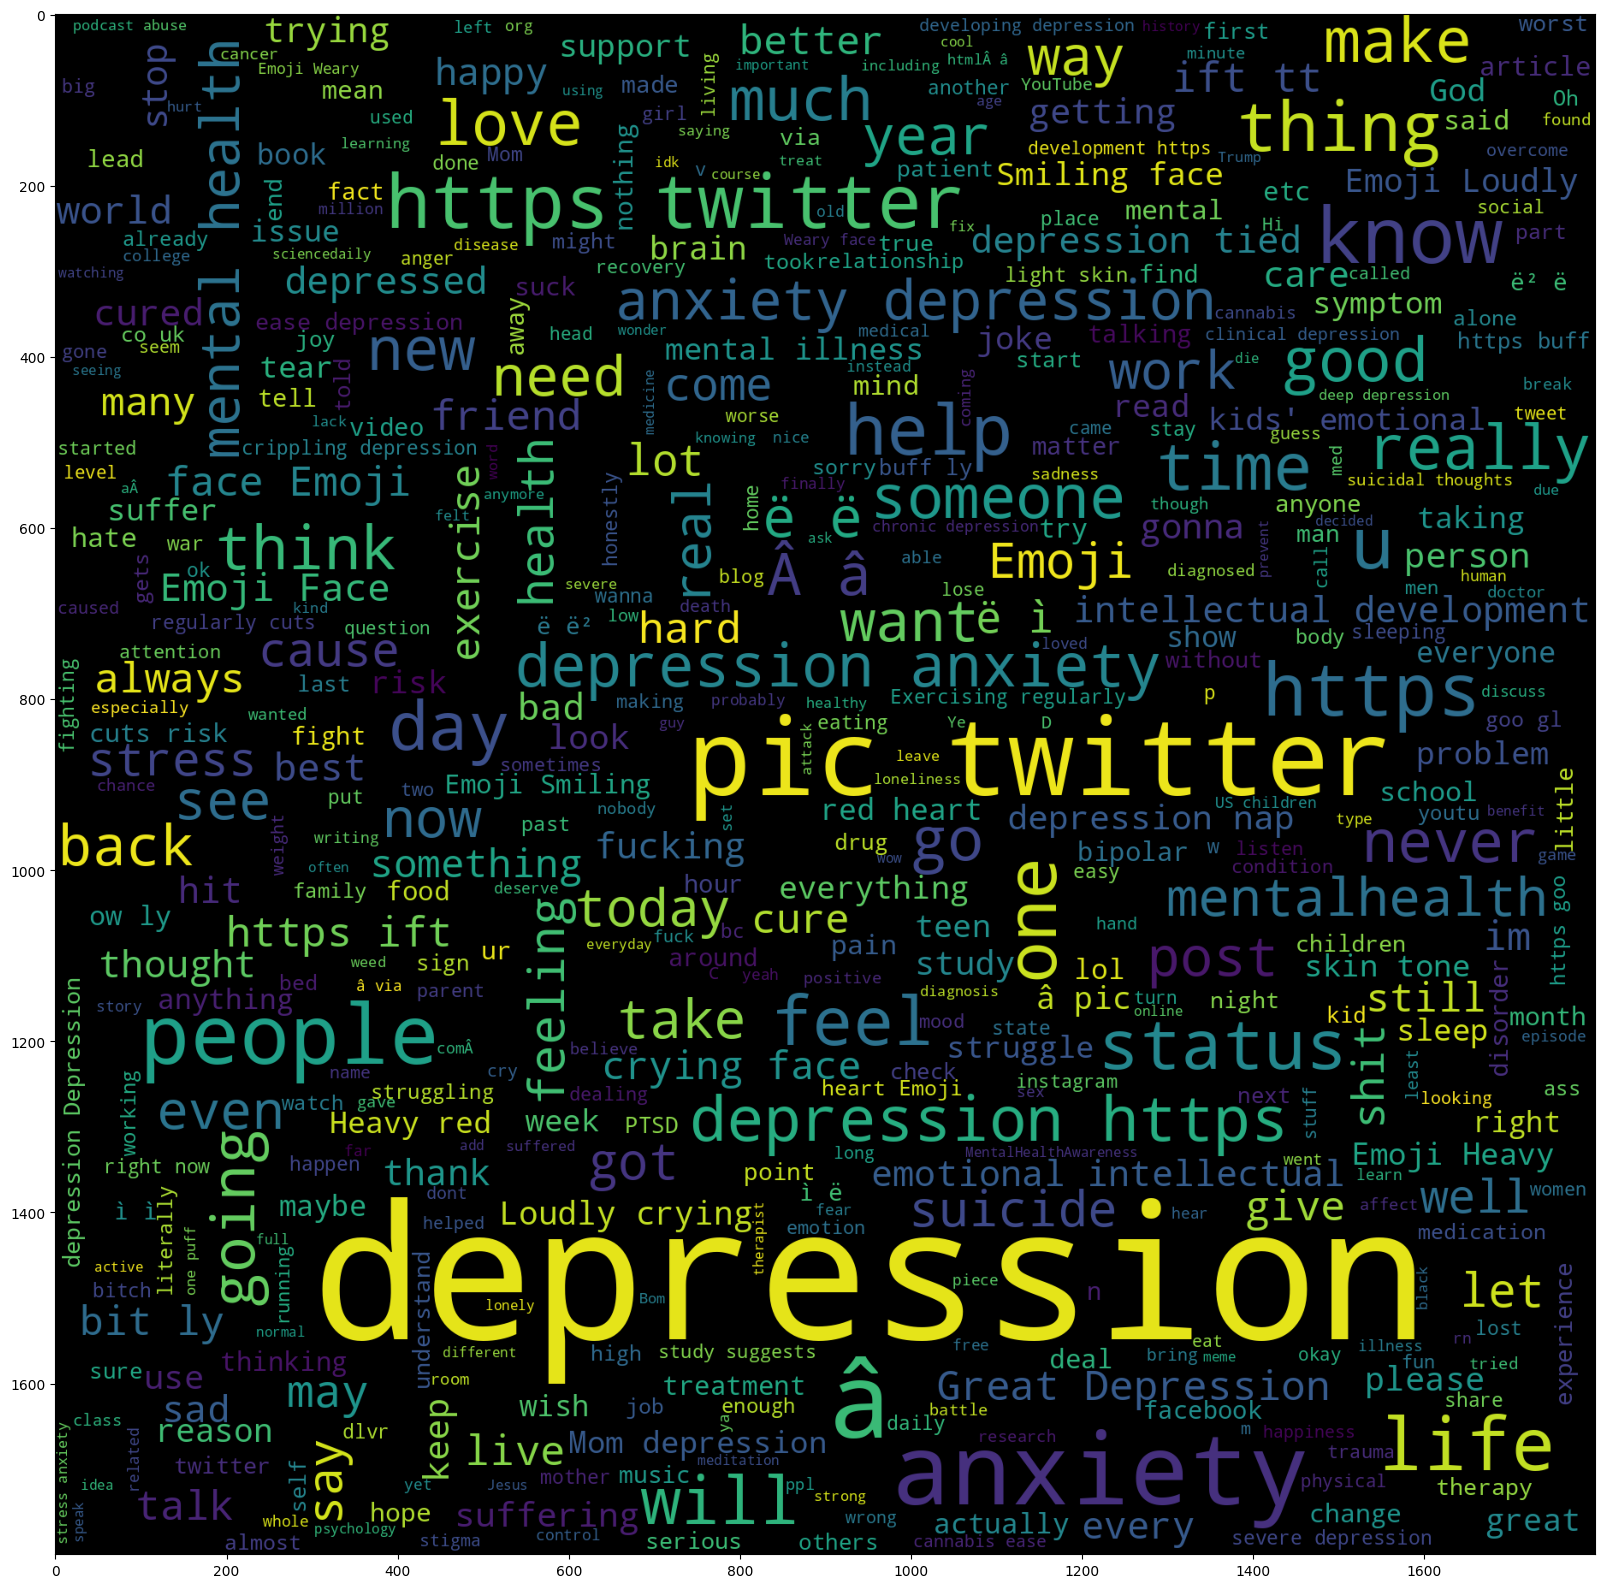

In [ ]:
# WordCloud on Depression Sentiments
print("start")
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

word_cloud_data = datatotal[datatotal['sentiment'] == 1]['message to examine']
plt.figure(figsize = (20,20))
wc_img_data = WordCloud(max_words = 500, width = 1800 , height = 1800).generate(" ".join(word_cloud_data))
plt.imshow(wc_img_data)
print("done")

start
done


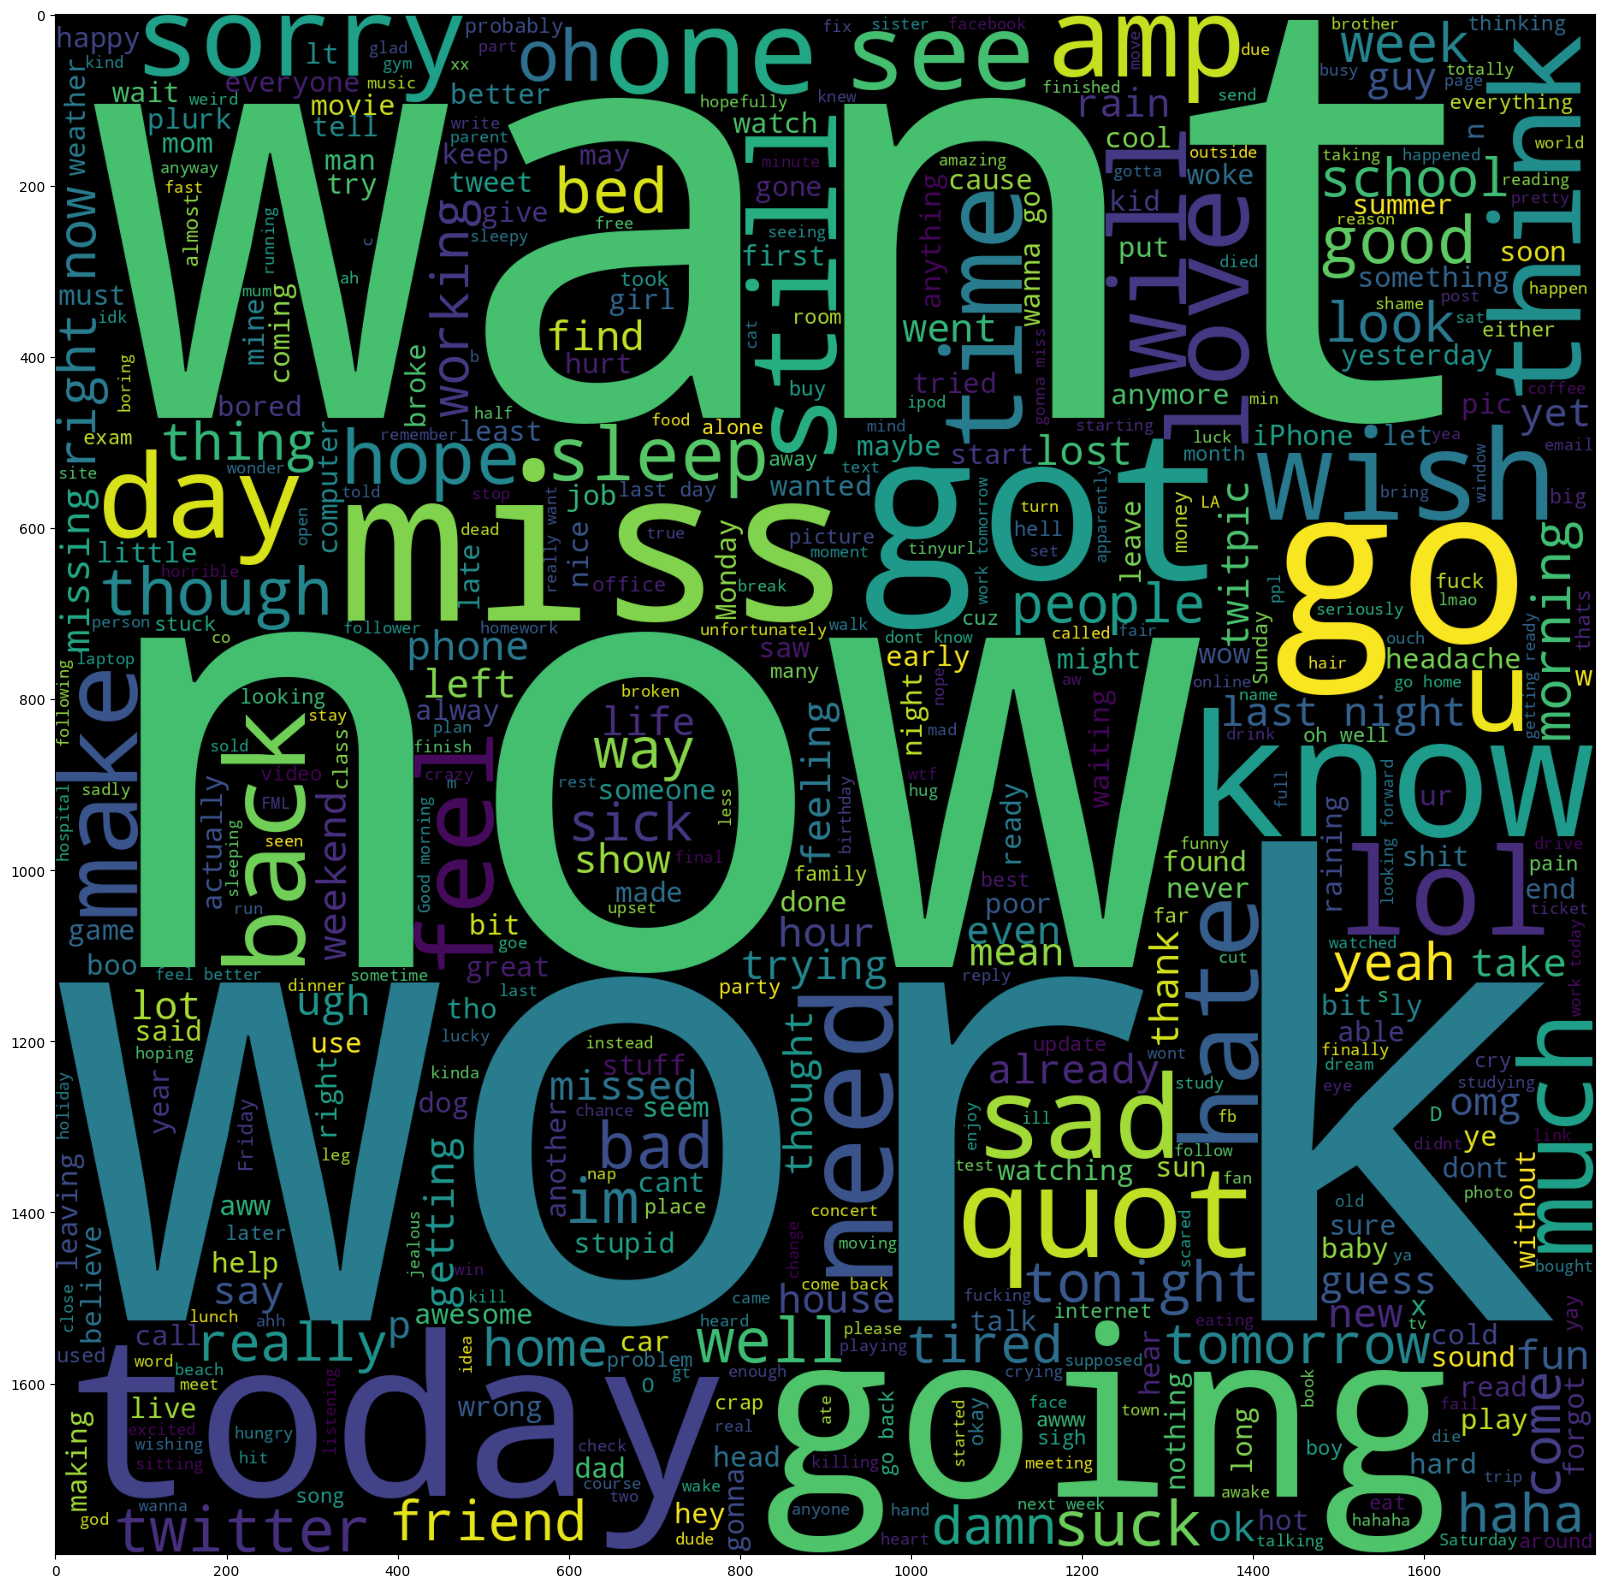

In [ ]:
# WordCloud on Depressive + Negative Tweets
print("start")

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# print(datatotal)
# print(datatotal[datatotal["sentiment"] == -1]["message"])
word_cloud_data = datatotal[datatotal['sentiment'] <= 0]['message to examine']
plt.figure(figsize = (20,20))
word_cloud_data = [str(datatotal) for datatotal in word_cloud_data]
wc_img_data = WordCloud(max_words = 500, width = 1800 , height = 1800).generate(" ".join(word_cloud_data))
plt.imshow(wc_img_data)
print("done")

start
done


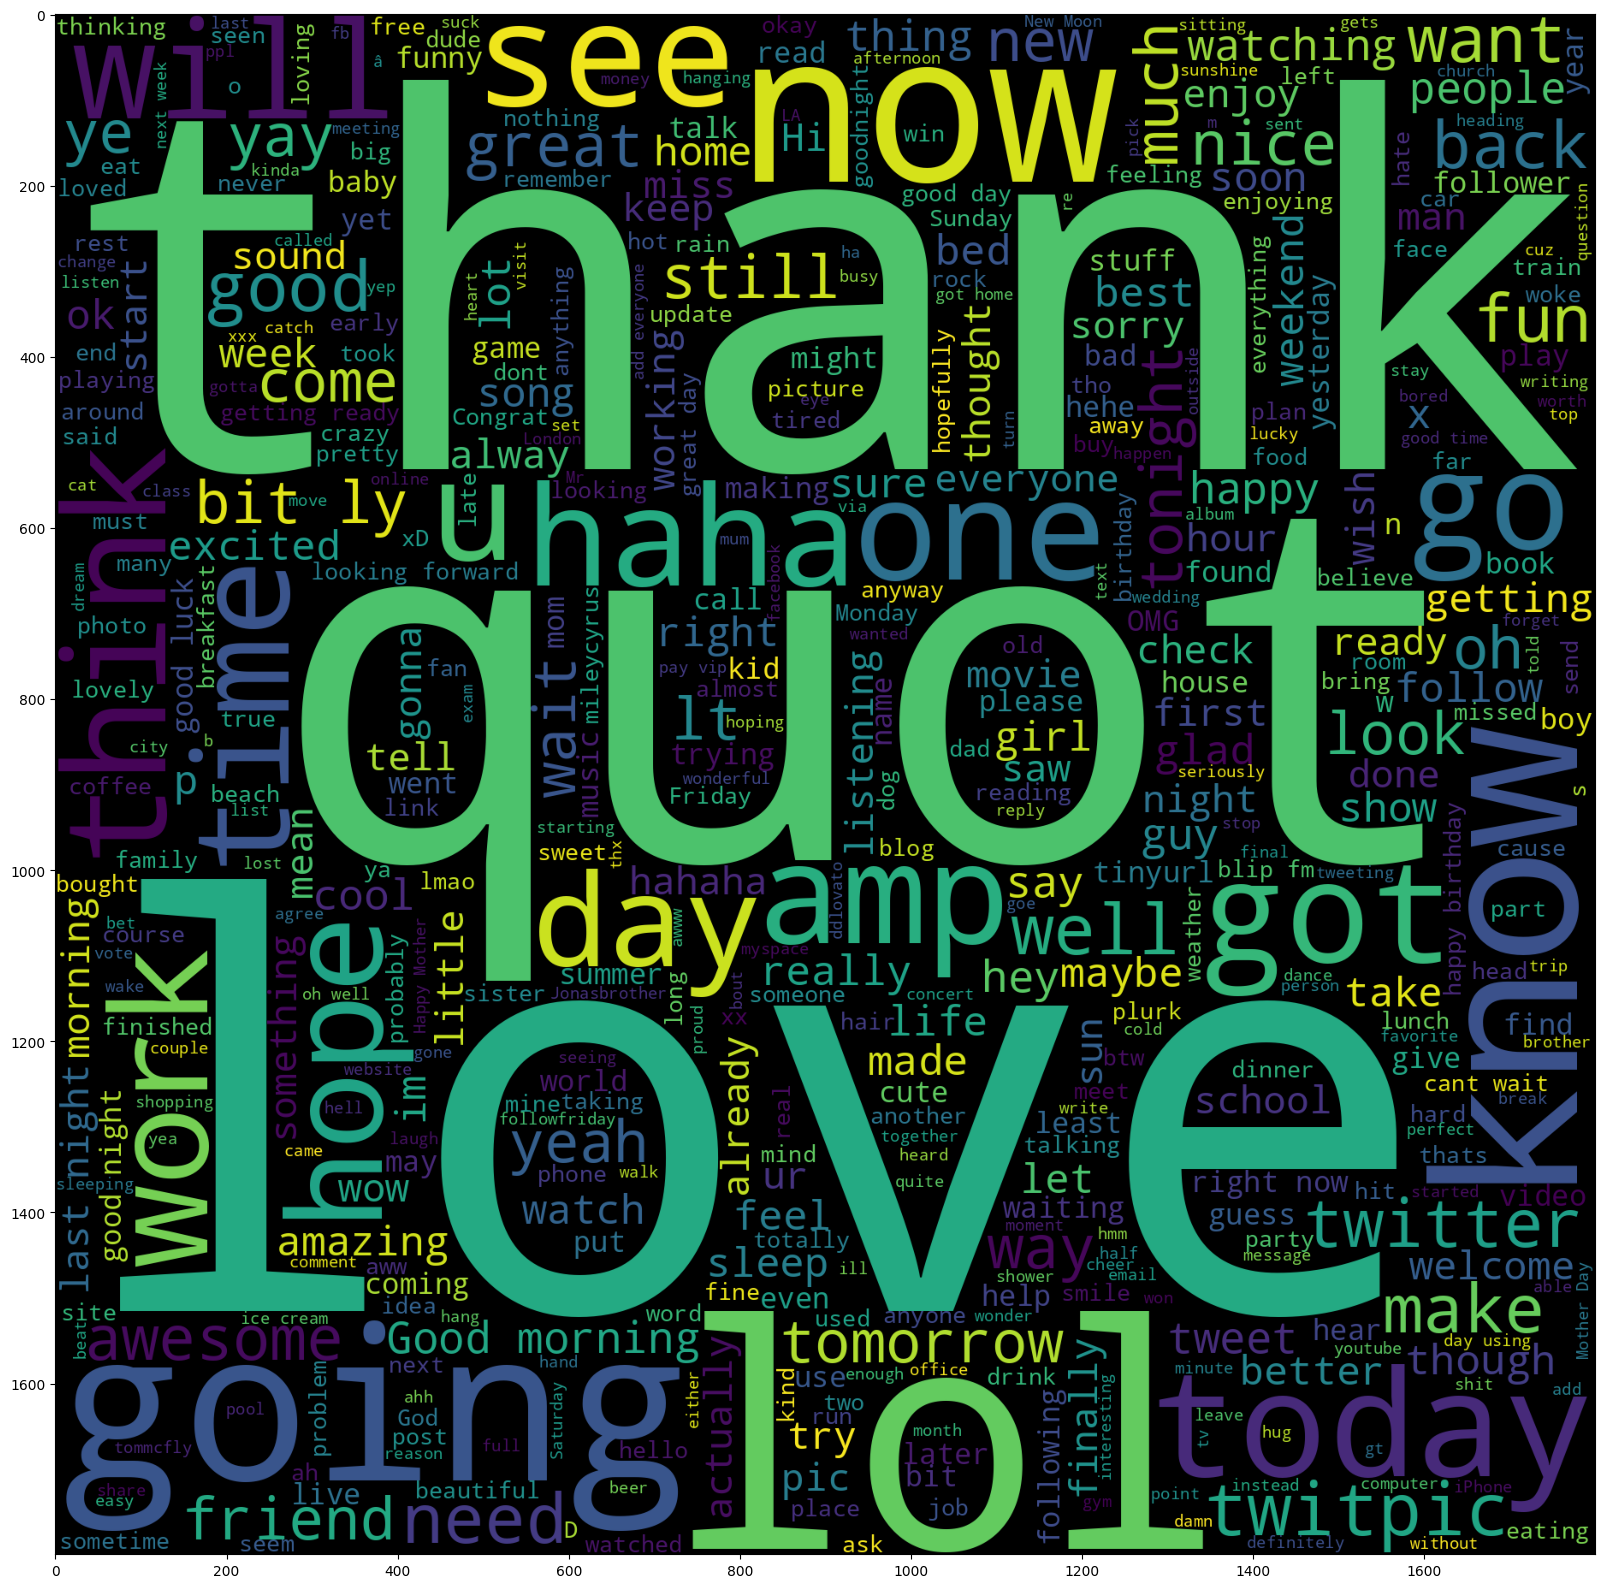

In [ ]:
# WordCloud on Positive Tweets
print("start")

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# print(datatotal)
# print(datatotal[datatotal["sentiment"] == -1]["message"])
word_cloud_data = datatotal[datatotal['sentiment'] == 4]['message to examine']
plt.figure(figsize = (20,20))
wc_img_data = WordCloud(max_words = 500, width = 1800 , height = 1800).generate(" ".join(word_cloud_data))
plt.imshow(wc_img_data)
print("done")

In [ ]:
from sklearn.model_selection import train_test_split
input_data = datatotal["message to examine"]
output_data = datatotal["sentiment"]
input_train,input_test,output_train,output_test = train_test_split(input_data , output_data, test_size = 0.2,random_state=156654)
print(input_train.shape)
print(input_test.shape)

(1288251,)
(322063,)


In [ ]:
# Vectorizing input to input into model
print("start")
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser= TfidfVectorizer(ngram_range=(1,2),max_features = 500000)
vectoriser.fit(input_train)
input_train = vectoriser.transform(input_train)
input_test = vectoriser.transform(input_test)
print("done")

start
done


In [ ]:
print("start")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# model = KNeighborsClassifier(n_neighbors=4)
model = LogisticRegression(C=2,max_iter= 1000,n_jobs=1)
print("done")
# model = DecisionTreeClassifier()
model.fit(input_train, output_train)
print("done")

start
done
done


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

output_predicted = model.predict(input_test)
print("done")

print(classification_report(output_test,output_predicted))
print("done")

print(metrics.accuracy_score(output_test,output_predicted))
print("done")

done
              precision    recall  f1-score   support

           0       0.83      0.81      0.82    161744
           1       0.95      0.83      0.89       430
           4       0.81      0.83      0.82    159889

    accuracy                           0.82    322063
   macro avg       0.86      0.82      0.84    322063
weighted avg       0.82      0.82      0.82    322063

done
0.8186814381037251
done


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Assuming you have already defined and trained your 'model'
output_predicted = model.predict(input_test)

# Print the confusion matrix
conf_matrix = confusion_matrix(output_test, output_predicted)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[131123     20  30601]
 [    53    358     19]
 [ 27703      0 132186]]
